# Prezzi dei tubi posati
---
Franzoi - Rebellato - 2019-06-08

Stima, a partire dall'elenco prezzi della Provincia Autonoma di Trento, della posa delle condotte in funzione del diametro esterno.  
L'approssimazione è stata fatta attraverso la regressione lineare.

In [2]:
import math
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.linear_model import LinearRegression
import os 

Sul prezzario del PAT si trovano i seguenti dati riferiti alle condotte _posate_ in polietilene **SN 8**

In [3]:
prezziprovincia = pd.DataFrame(
[40.01, 52.64, 69.28, 100.35, 144.8, 216.37], 
[200, 250, 315, 400, 500, 630], columns = ['prezzi']
)
prezziprovincia

,prezzi
200,40.01
250,52.64
315,69.28
400,100.35
500,144.80
630,216.37


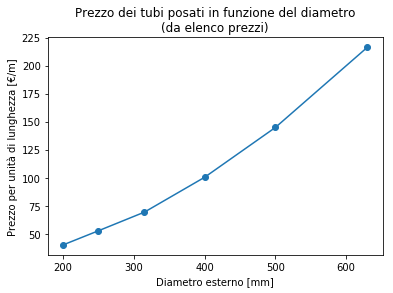

In [4]:
plt.plot(prezziprovincia, 'o-')
plt.title('Prezzo dei tubi posati in funzione del diametro\n(da elenco prezzi)')
plt.xlabel('Diametro esterno [mm]')
plt.ylabel('Prezzo per unità di lunghezza [€/m]')
plt.show()

Mentre i prezzi del solo tubo, ricavati da oppo.it, sono i seguenti

In [5]:
prezzioppo = pd.DataFrame(
[
    9.89, 14.38, 20.79, 29.70, 37.18, 46.64, 58.3, 77.44, 95.7, 119.02, 151.25, 204.6, 279.4, 300.85, 421.3
],
[
    160, 200, 250, 315, 350, 400, 465, 500, 580, 630, 700, 800, 930, 1000, 1200
] 
, columns = ['prezzi'])
prezzioppo

,prezzi
160,9.89
200,14.38
250,20.79
315,29.70
350,37.18
400,46.64
465,58.30
500,77.44
580,95.70
630,119.02


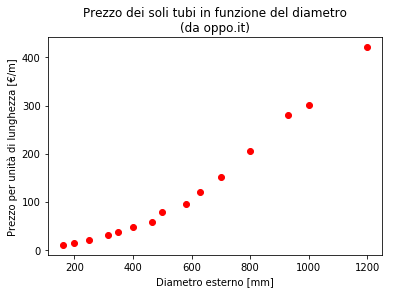

In [6]:
plt.plot(prezzioppo, 'o', c = 'r')
plt.title('Prezzo dei soli tubi in funzione del diametro\n(da oppo.it)')
plt.xlabel('Diametro esterno [mm]')
plt.ylabel('Prezzo per unità di lunghezza [€/m]')
plt.show()

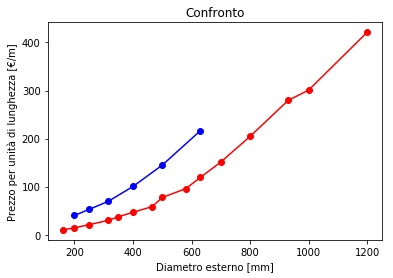

In [7]:
plt.plot(prezziprovincia, 'bo-', prezzioppo, 'ro-')
plt.title('Confronto')
plt.xlabel('Diametro esterno [mm]')
plt.ylabel('Prezzo per unità di lunghezza [€/m]')
plt.show()

Poiché i prezzi per i tubi di diametro esterno maggiore di 630 mm non sono presenti nell'elenco prezzi della Provincia Autonoma di Trento, si procede approssimando i dati del prezzario con una retta.

In [8]:
prezziprovincia = prezziprovincia.reset_index()
data = np.matrix(prezziprovincia)
data

matrix([[200.  ,  40.01],
        [250.  ,  52.64],
        [315.  ,  69.28],
        [400.  , 100.35],
        [500.  , 144.8 ],
        [630.  , 216.37]])

In [9]:
X, Y = data[:, 0], data[:, 1]

In [10]:
sol = LinearRegression().fit(X,Y)
sol.score(X,Y)

0.9790698760458663

In [11]:
m = sol.coef_[0]
q = sol.intercept_[0]
print('y =', m, 'x','+', q)

y = [0.40805639] x + -52.173235528369716


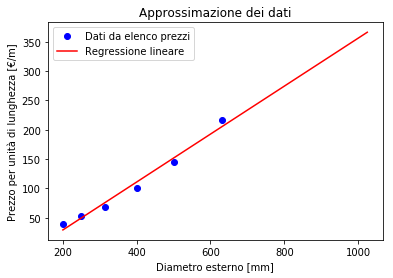

In [12]:
plt.plot(X,Y, 'bo')
t = np.linspace(200, 1025, 100)
plt.plot(t, m*t+q, 'r' )
plt.title('Approssimazione dei dati')
plt.xlabel('Diametro esterno [mm]')
plt.ylabel('Prezzo per unità di lunghezza [€/m]')
plt.legend(['Dati da elenco prezzi', 'Regressione lineare'])
plt.show()

Per una condotta di diametro esterno pari a 1.2 m, il prezzo trovato è di

In [13]:
sol.predict([[1200]])

array([[437.49443149]])

In [14]:
diam = prezzioppo.index.tolist()
for i in range(len(diam)):
    diam[i] = [diam[i]]
    
diam

[[160],
 [200],
 [250],
 [315],
 [350],
 [400],
 [465],
 [500],
 [580],
 [630],
 [700],
 [800],
 [930],
 [1000],
 [1200]]

In [15]:
prezzi = sol.predict(diam)
prezzi = prezzi.tolist()
for i in range(len(prezzi)):
    [prezzi[i]] = prezzi[i]
prezzi[1] = 40.01
prezzi[2] = 52.64
prezzi[3] = 69.28
prezzi[5] = 100.35
prezzi[7] = 144.8
prezzi[9] = 216.37
prezzi

[13.115786740577974,
 40.01,
 52.64,
 69.28,
 90.64650068495335,
 100.35,
 137.5729854407595,
 144.8,
 184.49947019656565,
 216.37,
 233.4662368982764,
 274.2718758163687,
 327.31920640988875,
 355.88315365255335,
 437.494431488738]

In [16]:
diameter = prezzioppo.index.tolist()
diameter

[160, 200, 250, 315, 350, 400, 465, 500, 580, 630, 700, 800, 930, 1000, 1200]

In [21]:
df = pd.DataFrame(prezzi, diameter, columns = ['Prezzi [€/m]'])
df.index.name = 'Diametro esterno [mm]'
df

,Prezzi [€/m]
Diametro esterno [mm],
160,13.115787
200,40.010000
250,52.640000
315,69.280000
350,90.646501
400,100.350000
465,137.572985
500,144.800000
580,184.499470


In [22]:
df.to_latex()

'\\begin{tabular}{lr}\n\\toprule\n{} &  Prezzi [€/m] \\\\\nDiametro esterno [mm] &               \\\\\n\\midrule\n160                   &     13.115787 \\\\\n200                   &     40.010000 \\\\\n250                   &     52.640000 \\\\\n315                   &     69.280000 \\\\\n350                   &     90.646501 \\\\\n400                   &    100.350000 \\\\\n465                   &    137.572985 \\\\\n500                   &    144.800000 \\\\\n580                   &    184.499470 \\\\\n630                   &    216.370000 \\\\\n700                   &    233.466237 \\\\\n800                   &    274.271876 \\\\\n930                   &    327.319206 \\\\\n1000                  &    355.883154 \\\\\n1200                  &    437.494431 \\\\\n\\bottomrule\n\\end{tabular}\n'

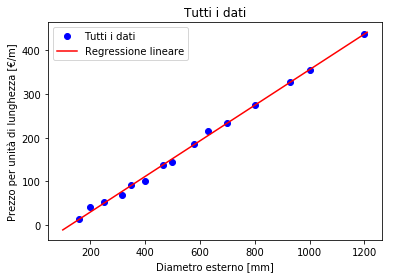

<Figure size 432x288 with 0 Axes>

In [25]:
plt.plot(df, 'bo')
h = np.linspace(100, 1210, 100)
plt.plot(h, m*h + q, 'r-' )
plt.title('Tutti i dati')
plt.xlabel('Diametro esterno [mm]')
plt.ylabel('Prezzo per unità di lunghezza [€/m]')
plt.legend(['Tutti i dati', 'Regressione lineare'])
plt.show()
plt.savefig('D:\\hydraulic-construction\\fognatura-pergine\\images\\interpolazione_costi_tubi.jpg')

In [19]:
os.getcwd()

'D:\\git\\pluviometria\\fognatura'

In [20]:
df.to_csv('prezzi_tubi.csv')

---